In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.rc('figure', figsize=(16,9))

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
from math import sqrt

from sklearn.metrics import mean_squared_error, explained_variance_score, mean_absolute_error
from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
from sklearn.ensemble import IsolationForest, RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

# Wrangling

In [3]:
from preprocessing import spotify_split, scale_data #,modeling_prep 
from acquire import concat_csv_files
from prepare import prepare_df, set_index

In [4]:
def modeling_prep():
    '''
    This function prepares the data for modeling
    '''
    # all local csv data compiled into a dataframe
    df = concat_csv_files()
    # adds new features, handles nulls, fixes data types, 
    # set the index to track_id, and fixes the tempo feature
    df = prepare_df(df)
    df = df.drop(columns='album')
    #encode album_type
    album_dummies = pd.get_dummies(df.album_type, drop_first=False).astype('int')
    df = pd.concat([df, album_dummies], axis=1)

    # drop any columns that won't contribute to modeling

    df = df.drop(columns=['album_popularity','label', 'artist', 
                        'release_date', 'track_name', 'album_id', 'album_type',
                        'release_year', 'release_month', 'release_day', 'duration_minutes', 
                        'duration_seconds', 'decade', 'is_top_billboard_label'])
    return df

In [5]:
df = modeling_prep()

In [6]:
#genre = pd.read_csv('genre_count_df.csv')
#genre = set_index(genre)
#genre = genre[genre.columns[32:]]

In [7]:
#df = df.merge(genre, on='track_id', suffixes=[None, '_'])
#df = df.dropna()

In [8]:
#df.info()

In [9]:
#df.head(2)

In [10]:
#genre.head(2)

In [11]:
df.head(2)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,popularity,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,,
6mecZbKK3JDeMdFRNxsCV5,0.792,0.594,2,-8.544,1,0.300,0.0,0.244,0.351,82.512,232803,4,1,43,1,1,0,0,0,1
5PtMwNq8Dp31uYdGGacVJE,0.816,0.578,9,-6.912,1,0.233,0.0,0.114,0.265,148.077,193920,4,1,61,1,11,0,1,0,0


In [12]:
df.shape

(5733, 20)

---
### Split the Data

In [13]:
X_train, y_train, X_validate, y_validate, X_test, y_test, train, validate, test = spotify_split(df, 'popularity')
X_train.head(2)

Shape of train: (4012, 19) | Shape of validate: (861, 19) | Shape of test: (860, 19)
Percent train: 70.0        | Percent validate: 15.0       | Percent test: 15.0


,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.585,0.471,4,-9.934,0,0.0616,0.0184,0.115,0.323,93.099,142000,4,1,1,1,0,0,0,1
0HO8pCseEpgozNi3z0R4bc,0.833,0.518,10,-10.126,0,0.3490,0.0000,0.635,0.773,90.004,120000,4,1,1,11,0,1,0,0


---
### Scale the Data

In [14]:
#  Using MIN-MAX scaler
X_train_mm, X_validate_mm, X_test_mm = scale_data(train, validate, test, 'popularity', 'MinMax')
X_train_mm.head(3)

,danceability,energy,key,loudness,mode,speechiness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,explicit,disc_number,track_number,is_featured_artist,album,compilation,single
track_id,,,,,,,,,,,,,,,,,,,
30bqVoKjX479ab90a8Pafp,0.593306,0.439493,0.363636,0.580823,0.0,0.064033,0.019127,0.101302,0.328921,0.547673,0.234238,0.8,1.0,0.0,0.000000,0.0,0.0,0.0,1.0
0HO8pCseEpgozNi3z0R4bc,0.844828,0.489960,0.909091,0.572667,0.0,0.362786,0.000000,0.651741,0.787169,0.529466,0.194025,0.8,1.0,0.0,0.163934,0.0,1.0,0.0,0.0
643K3eEgRvdJiXjSzlz7dg,0.477688,0.654247,0.090909,0.745826,1.0,0.354470,0.000000,0.305600,0.865580,0.520216,0.435841,0.8,1.0,0.0,0.016393,0.0,1.0,0.0,0.0


--- 
# Feature Selection

In [15]:
from preprocessing import rfe, select_kbest

In [16]:
skb_features = select_kbest(X_train_mm, y_train, 5)
skb_features

['speechiness', 'explicit', 'track_number', 'is_featured_artist', 'single']

In [17]:
rfe_features = rfe(X_train, y_train, 5)
rfe_features

['danceability', 'energy', 'speechiness', 'explicit', 'is_featured_artist']

In [18]:
# Select K Best Top 5 Features DF
X_tr_skb = X_train_mm[skb_features]
X_v_skb = X_validate_mm[skb_features]
X_te_skb = X_test_mm[skb_features]

In [19]:
# Recursive Feature Elimination Top 5 Features DF
X_tr_rfe = X_train_mm[rfe_features]
X_v_rfe = X_validate_mm[rfe_features]
X_te_rfe = X_test_mm[rfe_features]

In [20]:
# Combo Top 5 Features
top_feats = ['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'single']
X_tr_top = X_train_mm[top_feats]
X_v_top = X_validate_mm[top_feats]
X_te_top = X_test_mm[top_feats]

In [21]:
# Combo2 Top 6 Features
top_feats2 = ['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'track_number', 'energy', 'single']
X_tr_top2 = X_train_mm[top_feats2]
X_v_top2 = X_validate_mm[top_feats2]
X_te_top2 = X_test_mm[top_feats2]

---
# Cross Validation
- Optimize Hyperparameters

### CV Using SKB Features

too complicated at the moment

---
# Modeling
### Set the baseline

In [22]:
from model import get_baseline_metrics, linear_regression_model, lasso_lars
from model import polynomial_regression, svr_model, glm_model, evaluate_df
from model import visualize_model, visualize_error

In [23]:
bl, bl_train_rmse = get_baseline_metrics(y_train)

RMSE (Root Mean Square Error) of Baseline on train data:
 22.897138


---
### Models using ALL Features

In [344]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_train_mm, y_train, X_validate_mm, y_validate, X_test_mm, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.487177 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 20.693288 

RMSE for SVR using RBF Kernel 

On train data:
 21.660053 

RMSE for GLM using Normal Distribution 

On train data:
 21.510856 



In [345]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('ALL FEATURES')
print(f'Model beat baseline by {abs((glm_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

ALL FEATURES
Model beat baseline by 6.62%


,train_rmse,validate_rmse,test_rmse
pf2_lr,20.693288,21.5614,
ols,21.487177,21.3973,
GLM,21.510856,21.3814,
SVM,21.660053,21.6534,
baseline,22.897138,,
lassolars,22.897138,22.8377,


In [26]:
# create the model object
glm = TweedieRegressor(alpha = 0, power= 1)

# fit the model to our training data
glm.fit(X_train_mm, y_train)
feature_importances = pd.DataFrame(glm.coef_,
                                       index = X_train_mm.columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
feature_importances.head(5), feature_importances.tail(5)

(                    importance
 loudness              1.151842
 danceability          0.210151
 explicit              0.205623
 is_featured_artist    0.171641
 tempo                 0.142183,
               importance
 album          -0.132847
 compilation    -0.238549
 speechiness    -0.402822
 track_number   -0.684998
 energy         -0.763232)

---
### Models using SKB Features

In [27]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_skb, y_train, X_v_skb, y_validate, X_te_skb, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.905982 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.82078 

RMSE for SVR using RBF Kernel 

On train data:
 21.960632 

RMSE for GLM using Normal Distribution 

On train data:
 21.934884 



In [28]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('SKB FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(skb_features)
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

SKB FEATURES
Model beat baseline by 5.16%
['speechiness', 'explicit', 'track_number', 'is_featured_artist', 'single']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.820780,21.8672,
ols,21.905982,21.9519,
GLM,21.934884,21.9476,
SVM,21.960632,21.9514,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using RFE Features

In [29]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_rfe, y_train, X_v_rfe, y_validate, X_te_rfe, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 22.020966 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.884338 

RMSE for SVR using RBF Kernel 

On train data:
 22.03261 

RMSE for GLM using Normal Distribution 

On train data:
 22.026116 



In [30]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('RFE FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(rfe_features)
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

RFE FEATURES
Model beat baseline by 4.71%
['danceability', 'energy', 'speechiness', 'explicit', 'is_featured_artist']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.884338,21.8565,
ols,22.020966,21.9541,
GLM,22.026116,21.9487,
SVM,22.032610,21.9516,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using COMBO Top Features

In [41]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_top, y_train, X_v_top, y_validate, X_te_top, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.909077 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.836053 

RMSE for SVR using RBF Kernel 

On train data:
 21.92887 

RMSE for GLM using Normal Distribution 

On train data:
 21.930506 



In [42]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
index = ['baseline', 'ols', 'lassolars', 'pf2_lr', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, ''], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('COMBO TOP 5 FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(top_feats)
pd.DataFrame(columns=columns, data=data, index=index).sort_values(by='train_rmse')

COMBO TOP 5 FEATURES
Model beat baseline by 5.33%
['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'single']


,train_rmse,validate_rmse,test_rmse
pf2_lr,21.836053,21.8135,
ols,21.909077,21.9204,
SVM,21.928870,21.8463,
GLM,21.930506,21.9382,
baseline,22.897138,,
lassolars,22.897138,22.8377,


---
### Models using COMBO 2 Top Features

In [48]:
# OLS Model
lm_rmse, lm_rmse_v, lm_rmse_t = linear_regression_model(
    X_tr_top2, y_train, X_v_top2, y_validate, X_te_top2, y_test)
# LASSO + LARS Model
lars_rmse, lars_rmse_v, lars_rmse_t = lasso_lars(
    X_tr_top2, y_train, X_v_top2, y_validate, X_te_top2, y_test)
# Polynomial Features (squared, deg=2) with Linear Regression
lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t, lm_sq_pred_t = polynomial_regression(
    X_tr_top2, y_train, X_v_top2, y_validate, X_te_top2, y_test, 
    'Squared', degree=2) 
# Support Vector Regression with RBF Kernel
svr_rmse, svr_rmse_v, svr_rmse_t = svr_model(
    X_tr_top2, y_train, X_v_top2, y_validate, X_te_top2, y_test, 'RBF')
# General Linearized Model with Normal Distribution
glm_rmse, glm_rmse_v, glm_rmse_t, glm_pred_t = glm_model(
    X_tr_top2, y_train, X_v_top2, y_validate, X_te_top2, y_test, 
    'Normal', alpha=0, power=1)

RMSE for OLS using Linear Regression 

On train data:
 21.796331 

RMSE for LASSO + LARS 

On train data:
 22.897138 

RMSE for Polynomial Squared + Linear Regression 

On train data:
 21.599581 

RMSE for SVR using RBF Kernel 

On train data:
 21.812662 

RMSE for GLM using Normal Distribution 

On train data:
 21.821093 



In [58]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
iindex = ['Baseline', 'Linear Regression', 'lassolars', 'Polynomial 2nd Degree', 'SVM', 'GLM']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lars_rmse, lars_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t], 
        [svr_rmse, svr_rmse_v, ''],
        [glm_rmse, glm_rmse_v, '']]
print('COMBO 2 TOP FEATURES')
print(f'Model beat baseline by {abs((lm_sq_rmse_t - bl_train_rmse)/bl_train_rmse)*100:.2f}%')
print(top_feats2)
mod_perf = pd.DataFrame(columns=columns, data=data, index=iindex).sort_values(by='train_rmse')
mod_perf

COMBO 2 TOP FEATURES
Model beat baseline by 6.00%
['danceability', 'speechiness', 'explicit', 'is_featured_artist', 'track_number', 'energy', 'single']


,train_rmse,validate_rmse,test_rmse
Polynomial 2nd Degree,21.599581,21.5257,21.5236
Linear Regression,21.796331,21.7566,
SVM,21.812662,21.6988,
GLM,21.821093,21.7578,
Baseline,22.897138,,
lassolars,22.897138,22.8377,


In [55]:
from sklearn.metrics import r2_score
r2_score(y_test, lm_sq_pred_t)

0.128406702334395

In [357]:
from sklearn.preprocessing import PolynomialFeatures
# create polynomial features object
pf = PolynomialFeatures(degree=2).fit(X_tr_top2)

# fit and transform the train data
X_train_sq = pf.transform(X_tr_top2)
# transform the validate data
X_validate_sq = pf.transform(X_v_top2)
# transform the validate data
X_test_sq = pf.transform(X_te_top2)

# create the linear regression model
lm_sq = LinearRegression()
# fit the model to the training data
lm_sq.fit(X_train_sq, y_train)

y_pred_test = lm_sq.predict(X_test_sq)

#pf.get_feature_names(X_tr_top.columns)

In [66]:
#visualize_model(lm_sq_pred_t, y_test, bl, 'Polynomial Features with Linear Regression')

In [65]:
#visualize_error(lm_sq_pred_t, y_test, bl, 'Polynomial Features with Linear Regression')

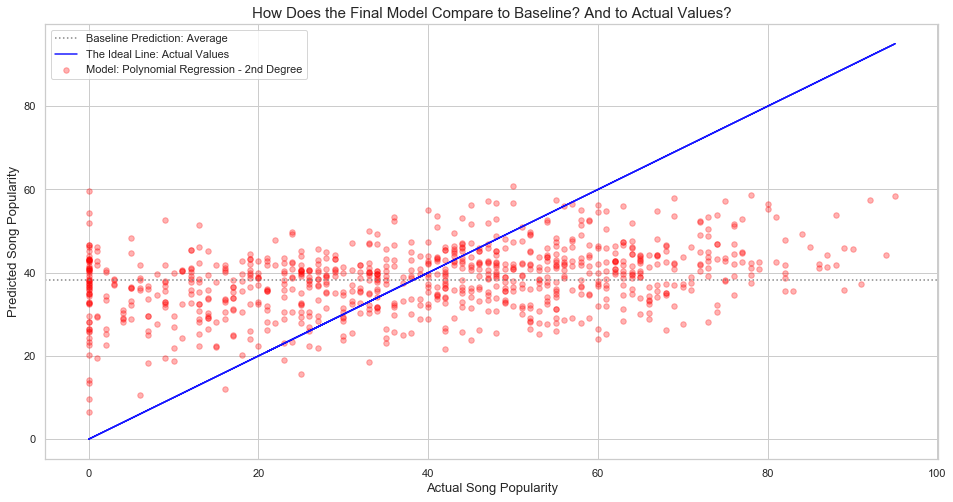

In [69]:
# first, a gray line representing the baseline prediction, 
# a horizontal line because it only predicts the average
plt.figure(figsize=(16,8))
plt.axhline(bl, alpha=.95, color="gray", linestyle=':', label='Baseline Prediction: Average')

# next, straight line for the actual values
# y = x, i.e. when the value is 10 it would be predicted 10, when 60 it would be 60, etc.
plt.plot(y_test, y_test, alpha=.9, color="blue", label='The Ideal Line: Actual Values')

# next, a scatter plot representing each observation (song popularity) as the actual value vs. the predicted value
plt.scatter(y_test, lm_sq_pred_t, 
        alpha=.3, color='red', s=30, label='Model: Polynomial Regression - 2nd Degree')

# adding plot labels
plt.legend()
plt.xlabel("Actual Song Popularity", size=13)
plt.ylabel("Predicted Song Popularity", size=13)
plt.title("How Does the Final Model Compare to Baseline? And to Actual Values?", size=15)
plt.show()

In [39]:
def get_important_feats(model, X):
    feature_importances = pd.DataFrame(rf.featureimportances,
                                       index = X_train_scaled.columns,
                                        columns=['importance']).sort_values('importance',ascending=False)
    return feature_importances

Next
- put modeling prep into a function
- check the important feats for the ALL FEATURES MODEL
- clean up the notebook

In [62]:
columns = ['train_rmse', 'validate_rmse', 'test_rmse']
iindex = ['Baseline', 'Linear Regression', 'Polynomial 2nd Degree']
data = [[bl_train_rmse, '', ''],
        [lm_rmse, lm_rmse_v, ''],
        [lm_sq_rmse, lm_sq_rmse_v, lm_sq_rmse_t]]
mod_perf = pd.DataFrame(columns=columns, data=data, index=iindex).sort_values(by='train_rmse')
mod_perf

,train_rmse,validate_rmse,test_rmse
Polynomial 2nd Degree,21.599581,21.5257,21.5236
Linear Regression,21.796331,21.7566,
Baseline,22.897138,,


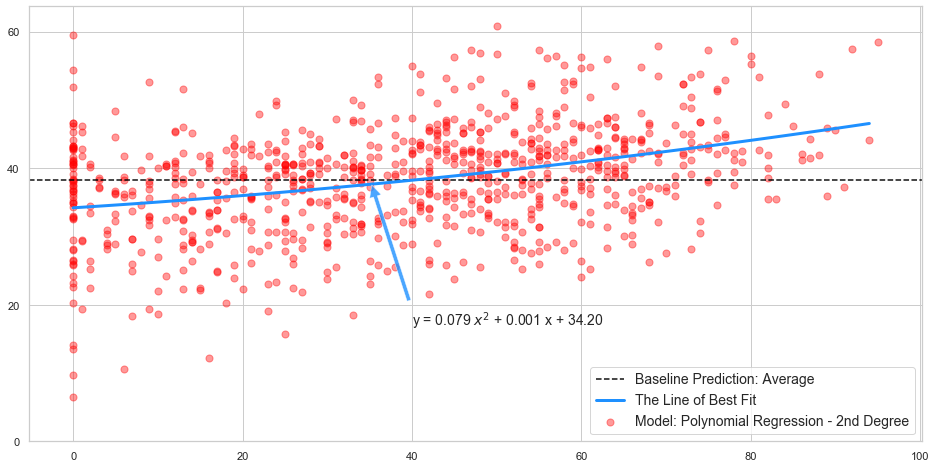

y = 0.079 $x^2$ + 0.001 x + 34.20


In [176]:
from scipy.optimize import curve_fit
# define the true objective function
def objective(x, a, b, c):
    return a * x + b * x**2 + c

x, y = y_test, y_pred_test
popt, _ = curve_fit(objective, x, y)
a, b, c = popt
equation = f'y = %.3f $x^2$ + %.3f x + %.2f' % (a, b, c)

# first, a gray line representing the baseline prediction,
# a horizontal line because it only predicts the average
plt.figure(figsize=(16,8))
plt.axhline(bl, alpha=.95, color="black", linestyle='--', label='Baseline Prediction: Average')

# define a sequence of inputs between the smallest and largest known inputs
x_line = np.arange(min(x), max(x), 1)
# calculate the output for the range
y_line = objective(x_line, a, b, c)
# create a line plot for the mapping function
plt.plot(x_line, y_line, color='dodgerblue', linewidth=3, label='The Line of Best Fit')

# next, a scatter plot representing each observation (song popularity) as the actual value vs. the predicted value
plt.scatter(y_test, lm_sq_pred_t, 
        alpha=.4, color='red', s=50, label='Model: Polynomial Regression - 2nd Degree')

# adding plot labels
plt.annotate(equation, xy=(35, 38.5), xytext=(40,17), size=14,
            arrowprops=dict(facecolor='dodgerblue', shrink=0.05, alpha=.8, linewidth=.5))
plt.legend(fontsize=14)
plt.xticks([0, 20, 40, 60, 80, 100])
plt.yticks([0, 20, 40, 60])
#plt.xlabel("Actual Song Popularity", size=14)
#plt.ylabel("Predicted Song Popularity", size=14)
#plt.title("How Does the Final Model Compare to Baseline? And to Actual Values?", size=15)
plt.show()
print(equation)

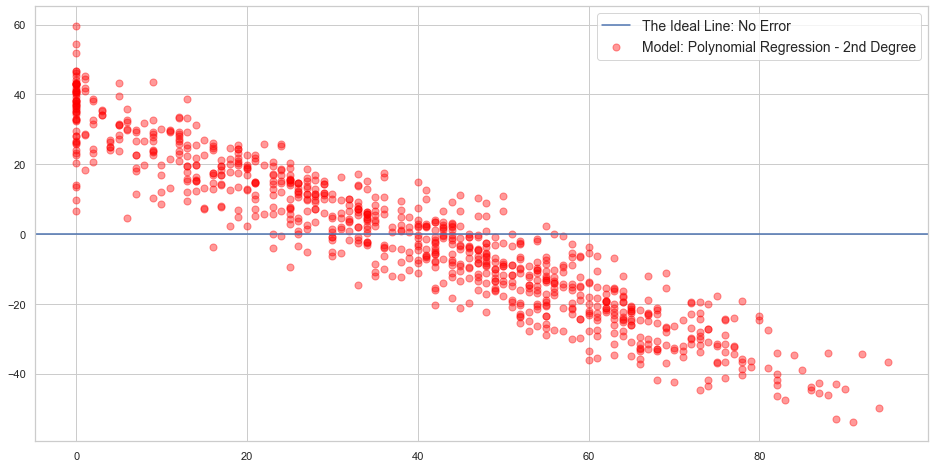

In [183]:
plt.figure(figsize=(16,8))

# a straight line for an observation having no error, would lie on this line
plt.axhline(label="The Ideal Line: No Error")

# the actual song popularity vs how far the prediction is from the actual
plt.scatter(y_test, y_pred_test - y_test, 
        alpha=.4, color='red', s=50, label= 'Model: Polynomial Regression - 2nd Degree')

# plot labels
plt.legend(fontsize=14)
#plt.xlabel("Actual Song Popularity", size=13)
#plt.ylabel("Residual/Error: Predicted Popularity - Actual Popularity", size=13)
#plt.title("Do the Size of Errors Change as the Popularity Changes?", size=15)

plt.show()

In [358]:
feature_importances = pd.DataFrame(lm_sq.coef_, 
                                   index = pf.get_feature_names(X_tr_top2.columns), 
                                   columns=['importance']).sort_values('importance', ascending=False)
#feature_importances#, feature_importances.tail(5)

In [359]:
feature_importances.importance = feature_importances.importance

feature_importances.sort_values(by='importance', ascending=False, inplace=True)

In [360]:
feature_importances.reset_index(inplace=True)

In [361]:
feature_importances.index = feature_importances.index + 1

In [362]:
feature_importances.reset_index(inplace=True)

In [363]:
feature_importances.rename(columns={'level_0':'rank'}, inplace=True)

In [364]:
feature_importances.set_index('index', inplace=True)

In [365]:
feature_importances.head()

,rank,importance
index,,
energy,1,44.288712
track_number,2,39.141969
danceability speechiness,3,37.674902
speechiness energy,4,21.006246
speechiness^2,5,16.910925


In [366]:
feature_importances.tail()

,rank,importance
index,,
energy^2,32,-37.705128
danceability track_number,33,-46.386784
speechiness track_number,34,-50.317919
speechiness,35,-73.828035
track_number single,36,-155.313290


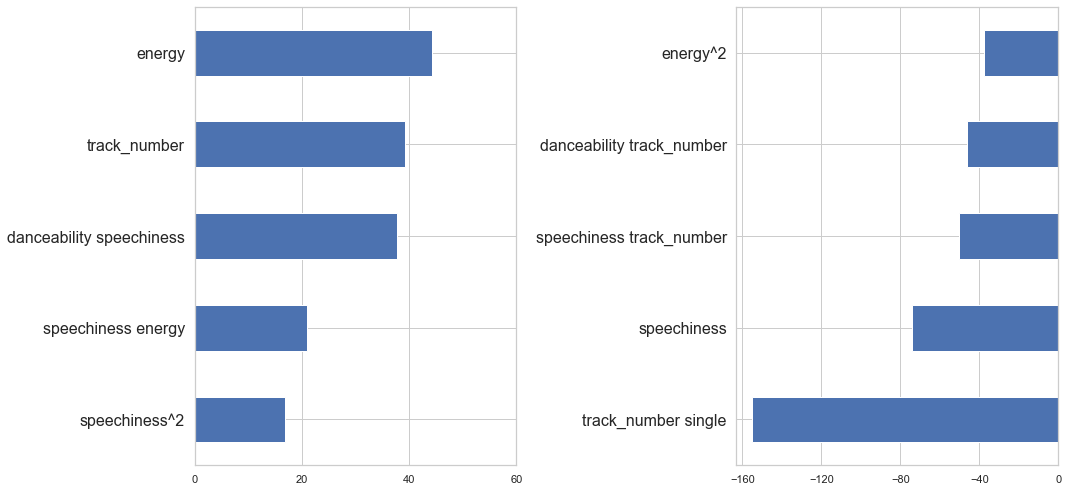

In [367]:
plt.figure(figsize=(15,7))

plt.subplot(121)
feature_importances.importance.head(5).sort_values(ascending=True).plot(kind='barh')
plt.ylabel('')
plt.yticks(size=16)
plt.xticks([0, 20, 40, 60])

plt.subplot(122)
feature_importances.importance.tail(5).sort_values(ascending=True).plot(kind='barh')
plt.ylabel('')
plt.yticks(size=16)
plt.xticks([0, -40, -80, -120, -160])
plt.tight_layout()

In [281]:
feature_importances

,rank,importance
index,,
track_number single,1,1.553133e+02
speechiness,2,7.382804e+01
speechiness track_number,3,5.031792e+01
danceability track_number,4,4.638678e+01
energy,5,4.428871e+01
track_number,6,3.914197e+01
energy^2,7,3.770513e+01
danceability speechiness,8,3.767490e+01
danceability,9,2.278948e+01
